In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import os
import seaborn as sns
import warnings

In [6]:
DAY_NIGHT_DATASET_PATH = "/Users/rsurridge/math-for-ml/Solar-ML-Forecast/datasets/hourly_day_and_night_weather.csv"
DAY_DATASET_PATH = "/Users/rsurridge/math-for-ml/Solar-ML-Forecast/datasets/hourly_day_only_weather.csv"

day_night_solar_df = pd.read_csv(DAY_NIGHT_DATASET_PATH, sep=",", index_col=0)
day_night_solar_df = day_night_solar_df.iloc[:, :10]
print(day_night_solar_df.head())

X_day_night = day_night_solar_df.iloc[:, :-1].values
y_day_night = day_night_solar_df.iloc[:, -1].values

day_solar_df = pd.read_csv(DAY_DATASET_PATH, sep=",", index_col=1)
day_solar_df = day_solar_df.iloc[:, 1:]
day_solar_df = day_solar_df.iloc[:, :10]
print(day_solar_df.head())

X_day = day_solar_df.iloc[:, :-1].values
y_day = day_solar_df.iloc[:, -1].values

         Hour  Cloud coverage  Visibility  Temperature  Dew point   
Date                                                                
1/31/16    24             0.0        5.00         1.40       0.89  \
2/1/16      1             0.0        7.88         1.16       0.62   
2/1/16      2             0.0        9.84         1.22       0.96   
2/1/16      3             0.0        9.84         1.02       0.61   
2/1/16      4             0.0        9.88         0.83       0.45   

         Relative humidity  Wind speed  Station pressure  Altimeter   
Date                                                                  
1/31/16              95.56        9.00             29.10      29.89  \
2/1/16               91.04        7.04             29.11      29.90   
2/1/16               89.28        8.96             29.12      29.91   
2/1/16               89.12        6.36             29.14      29.93   
2/1/16               90.08        6.12             29.15      29.94   

         Solar ene

In [12]:
save_dir = 'neural_network_plots'
os.makedirs(save_dir, exist_ok=True)

kf = KFold(n_splits=5, shuffle=True)

# Day and Night Dataset
feature_importance_day_night = np.zeros((5, X_day_night.shape[1]))
mse_values = []
fold_lst = []
best_mse = float('inf')
best_float = None

for fold, (train_index, val_index) in enumerate(kf.split(X_day_night, y_day_night)):
    X_train_fold, X_val_fold = X_day_night[train_index], X_day_night[val_index]
    y_train_fold, y_val_fold = y_day_night[train_index], y_day_night[val_index]

    mlp_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=100, random_state=42)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
    mlp_model.fit(X_train_fold, y_train_fold)

    feature_importance_day_night[fold, :] = mlp_model.coefs_[0].sum(axis=1)

    val_predicted = mlp_model.predict(X_day_night)
    mse = mean_squared_error(y_day_night, val_predicted)

    mse_values.append(mse)
    fold_lst.append(fold)

    if mse < best_mse:
        best_mse = mse
        best_fold = fold

feature_names_day_night = day_night_solar_df.columns[:9].tolist()
print("Day Night Dataset")
print(f"\nOverall Best Fold: {best_fold+1}")
print(f"Overall Best MSE: {best_mse}")
print(f"Fold List: {fold_lst}")
print(f"MSE Values: {mse_values}")
print(f"Features: {feature_names_day_night}")
print(f"Feature Importances: {feature_importance_day_night}")

# Day Only Dataset
feature_importance_day_only = np.zeros((5, X_day.shape[1]))
mse_values = []
fold_lst = []
best_mse = float('inf')
best_float = None

for fold, (train_index, val_index) in enumerate(kf.split(X_day, y_day)):
    X_train_fold, X_val_fold = X_day[train_index], X_day[val_index]
    y_train_fold, y_val_fold = y_day[train_index], y_day[val_index]

    mlp_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=100, random_state=42)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
    mlp_model.fit(X_train_fold, y_train_fold)

    feature_importance_day_only[fold, :] = mlp_model.coefs_[0].sum(axis=1)

    val_predicted = mlp_model.predict(X_day)
    mse = mean_squared_error(y_day, val_predicted)

    mse_values.append(mse)
    fold_lst.append(fold)

    if mse < best_mse:
        best_mse = mse
        best_fold = fold

feature_names_day_only = day_solar_df.columns[:9].tolist()
print("Day Only Dataset")
print(f"\nOverall Best Fold: {best_fold+1}")
print(f"Overall Best MSE: {best_mse}")
print(f"Fold List: {fold_lst}")
print(f"MSE Values: {mse_values}")
print(f"Features: {feature_names_day_only}")
print(f"Feature Importances: {feature_importance_day_only}")

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multi

Day Night Dataset

Overall Best Fold: 1
Overall Best MSE: 299999.08323250705
Fold List: [0, 1, 2, 3, 4]
MSE Values: [299999.08323250705, 305011.0631090529, 309302.89923081215, 302559.89696831687, 316963.5535526168]
Features: ['Hour', 'Cloud coverage', 'Visibility', 'Temperature', 'Dew point', 'Relative humidity', 'Wind speed', 'Station pressure', 'Altimeter']
Feature Importances: [[ -4.7955395  -26.13903798   9.32662606  12.29623509  -4.44298439
   -0.77450943   8.56693812   8.0457517   13.69431764]
 [ -3.22248926 -26.13690098   9.36489147  12.45264894  -3.13666785
   -1.17102542   9.14685786   8.31588945  13.9853981 ]
 [ -8.79560284 -27.5700385    9.84093252  12.32156109  -4.31781878
   -0.54575618   8.34781694   7.96255289  14.31013522]
 [  2.90201007 -29.97989642   7.1895262   11.38328235  -3.80120192
   -0.5416999    8.84525094   7.81430393  12.03327537]
 [ -1.80576665 -32.27021578   8.19067031  12.05957939  -5.4084669
   -1.50864603   9.29244899   8.89520611  12.43624751]]


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Day Only Dataset

Overall Best Fold: 1
Overall Best MSE: 889196.8253489851
Fold List: [0, 1, 2, 3, 4]
MSE Values: [889196.8253489851, 910166.6912872399, 900654.6850786376, 965251.6944530761, 900672.4003578628]
Features: ['Hour', 'Cloud coverage', 'Visibility', 'Temperature', 'Dew point', 'Relative humidity', 'Wind speed', 'Station pressure', 'Altimeter']
Feature Importances: [[ -8.43219604 -43.34711064   6.57154001  15.38288781  -7.83736417
   -0.26316524   5.91562201  16.82215399  11.17514683]
 [  3.43048773 -33.21537393   8.11900306  14.3482411   -7.96839684
   -1.35174118   6.33987136  12.71510774  12.85230323]
 [  7.57455502 -30.86281743   7.74672627  13.28775753  -8.05667263
   -1.17513892   5.25621538  11.31283105  14.27549377]
 [ -1.26105928 -32.07180154   8.23194398  14.63310344  -8.70938966
   -1.35477197   6.14318228  13.95205632  12.74173949]
 [ 10.92569005 -29.74690002   8.18904318  12.37744657  -7.92207173
   -1.30099333   5.08748744  11.43436661  14.24207724]]


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
max_iter_lst = [50, 100, 150, 200]
mse_values = []
best_mse = float('inf')
best_iter = None

feature_importance_matrix_day_night = np.zeros((len(max_iter_lst), X_day_night.shape[1]))

for idx, max_iter in enumerate(max_iter_lst):
    final_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=max_iter, random_state=42)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
    final_model.fit(X_day_night, y_day_night)
    feature_importance_matrix_day_night[idx, :] = final_model.coefs_[0].sum(axis=1)

    val_predicted = final_model.predict(X_day_night)
    mse = mean_squared_error(y_day_night, val_predicted)

    mse_values.append(mse)

    if mse < best_mse:
        best_mse = mse
        best_iter = max_iter

print("Day Night Dataset")
print(f"\nOverall Best Maximum Iteration: {best_iter}")
print(f"Overall Best MSE: {best_mse}")
print(f"Max Iteration List: {max_iter_lst}")
print(f"MSE Values: {mse_values}")
print(f"Features: {feature_names_day_night}")
print(f"Feature Importances: {feature_importance_matrix_day_night}")

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Day Night Dataset

Overall Best Maximum Iteration: 200
Overall Best MSE: 276525.5872170024
Max Iteration List: [50, 100, 150, 200]
MSE Values: [353541.61278828996, 292068.51423959906, 282112.8195144914, 276525.5872170024]
Features: ['Hour', 'Cloud coverage', 'Visibility', 'Temperature', 'Dew point', 'Relative humidity', 'Wind speed', 'Station pressure', 'Altimeter']
Feature Importances: [[-12.17295355 -24.26333989   9.65911705  12.67467219  -4.11036993
   -1.3029187    8.54191376  10.16498297  13.15261257]
 [-12.33777252 -28.59020373   9.45226705  12.96404646  -4.12913086
   -0.63112491   7.71737209   8.9351474   13.58416601]
 [-12.18306399 -29.68233632  10.05332878  12.93185847  -4.5752985
   -0.68722613   7.14740539   8.3949076   14.04351999]
 [-12.10547893 -29.37313429  10.44515761  12.91546672  -4.84136203
   -0.80125064   6.69573528   8.26991594  14.31685877]]


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [14]:
feature_importance_matrix_day_only = np.zeros((len(max_iter_lst), X_day.shape[1]))
mse_values = []
best_mse = float('inf')
best_iter = None

for idx, max_iter in enumerate(max_iter_lst):
    final_model = MLPRegressor(hidden_layer_sizes=(64, 64), max_iter=max_iter, random_state=42)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
    final_model.fit(X_day, y_day)
    feature_importance_matrix_day_only[idx, :] = final_model.coefs_[0].sum(axis=1)

    val_predicted = final_model.predict(X_day_night)
    mse = mean_squared_error(y_day_night, val_predicted)

    mse_values.append(mse)

    if mse < best_mse:
        best_mse = mse
        best_iter = max_iter

print("Day Only Dataset")
print(f"\nOverall Best Maximum Iteration: {best_iter}")
print(f"Overall Best MSE: {best_mse}")
print(f"Max Iteration List: {max_iter_lst}")
print(f"MSE Values: {mse_values}")
print(f"Features: {feature_names_day_only}")
print(f"Feature Importances: {feature_importance_matrix_day_only}")

/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


Day Only Dataset

Overall Best Maximum Iteration: 100
Overall Best MSE: 745598.1480586916
Max Iteration List: [50, 100, 150, 200]
MSE Values: [859591.3717311157, 745598.1480586916, 1218610.7610287878, 1955367.097640724]
Features: ['Hour', 'Cloud coverage', 'Visibility', 'Temperature', 'Dew point', 'Relative humidity', 'Wind speed', 'Station pressure', 'Altimeter']
Feature Importances: [[  2.63521922 -27.83532347   9.88975263  14.39169712  -6.6091631
   -2.2458646    7.26749507  14.40266618  13.29613803]
 [ 13.41517105 -35.89611317   7.65603052  12.24660365  -8.99258019
   -1.13044866   4.94168407   9.10405314  15.28396005]
 [ 14.84884097 -36.84289734   7.07647611   9.76594945 -11.24755328
   -0.59636677   4.33976116   6.98792126  15.64054753]
 [ 15.1364655  -31.27982436   6.73185217   8.53843888 -11.56722571
    0.06805048   4.13921898   6.18932672  16.29065229]]


/opt/homebrew/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


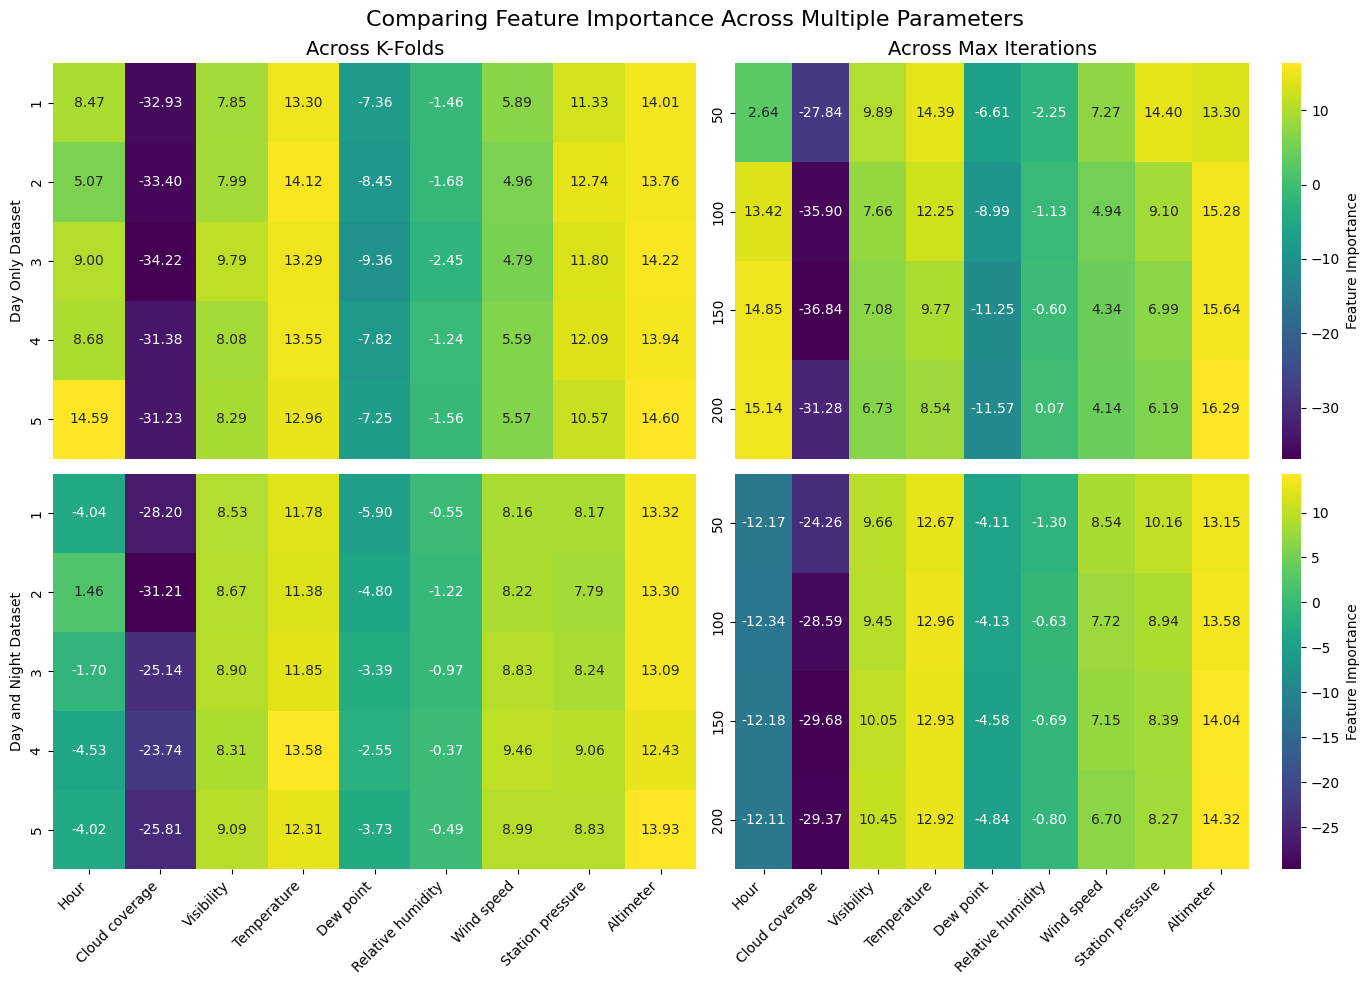

In [10]:
def plot_heatmap(ax, data, xticklabels, yticklabels, title, xlabel=True, ylabel=True, show_colorbar=True):
    sns.heatmap(data, annot=True, cmap='viridis', xticklabels=xticklabels, yticklabels=yticklabels, fmt='.2f', cbar=show_colorbar, cbar_kws={'label': 'Feature Importance'}, ax=ax)
    ax.set_title(title, fontsize=14)
    
    if not xlabel:
        ax.set_xlabel('')
    if not ylabel:
        ax.set_ylabel('')
    
    ax.set_xticklabels([] if not xlabel else ax.get_xticklabels(), rotation=45, ha='right')

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Day Only Dataset - K-Folds
plot_heatmap(axes[0, 0], feature_importance_day_only, [], range(1, 6), 'Across K-Folds', xlabel=False, show_colorbar=False)
axes[0, 0].set_ylabel('Day Only Dataset')

# Day Only Dataset - Max Iterations
plot_heatmap(axes[0, 1], feature_importance_matrix_day_only, [], max_iter_lst, 'Across Max Iterations', xlabel=False, ylabel=False, show_colorbar=True)

# Day and Night Dataset - K-Folds
plot_heatmap(axes[1, 0], feature_importance_day_night, feature_names_day_night, range(1, 6), title=None, ylabel=False, show_colorbar=False)
axes[1, 0].set_ylabel('Day and Night Dataset')

# Day and Night Dataset - Max Iterations
plot_heatmap(axes[1, 1], feature_importance_matrix_day_night, feature_names_day_night, max_iter_lst, title=None, ylabel=False, show_colorbar=True)

plt.suptitle('Comparing Feature Importance Across Multiple Parameters', fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, f'super_heatmap.png'))
plt.show()
